In [2]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 45.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=7a3b4d14f7be3481f602142072c0b3b60f4446761e25ce6a183c9bc3fb81b222
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib


In [4]:
body_df = pd.DataFrame(
    data={'身長': [170, 165, 182, 172, 168, 155, 150, 175, 178, 166],
          '体重': [60, 55, 80, 65, 52, 50, 45, 80, 60, 53]}
)

body_df

,身長,体重
0,170,60
1,165,55
2,182,80
3,172,65
4,168,52
5,155,50
6,150,45
7,175,80
8,178,60
9,166,53


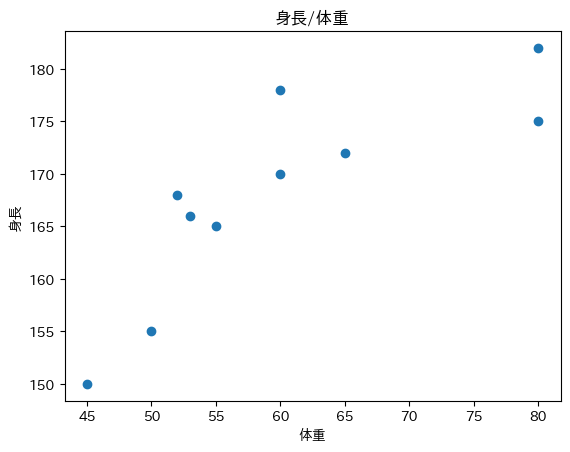

In [20]:
fig, ax = plt.subplots()
ax.set_title("身長/体重")
ax.set_xlabel("体重")
ax.set_ylabel("身長")
ax.scatter(body_df['体重'], body_df['身長'], marker='o')
plt.show()

## 標準偏差

$$
S = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2}
$$

In [6]:
## x標準偏差
x = body_df['体重']

x_mean = x.mean()
x_mean
tmp = (x - x_mean) ** 2
std_x = tmp.sum() / x.shape[0]
std_x = std_x ** 0.5
std_x

11.349008767288886

pandasのライブラリを使って標準偏差を算出する方法   
標本分散を算出したいときは引数にddof=0を指定します。


In [7]:
x.std(ddof=0)

11.349008767288886

In [8]:
## y標準偏差
y = body_df['身長']
y_mean = y.mean()
std_y = y.std(ddof=0)
std_y

9.332202312423364

## 共分散
$$
s_{xy}=\frac{1}{n}\sum_{i=1}^{n}(x_i- \bar{x})(y_i-\bar{y})
$$

In [9]:
## 共分散
tmp = (x - x_mean) * (y - y_mean)
cov = tmp.sum() / len(tmp)
cov

86.9

numpyを使って共分散を算出する方法   
分散と共分散が行列の形で出力される。

In [10]:
np.cov(x, y, bias=True)

array([[128.8 ,  86.9 ],
       [ 86.9 ,  87.09]])

## 相関係数
$$
r = \frac{s_{xy}}{s_xs_y}
$$

In [11]:
## 相関係数
r = cov / (std_x * std_y)
r

0.8204983266214019

In [12]:
## pandasで相関係数を求める
body_df.corr()

,身長,体重
身長,1.000000,0.820498
体重,0.820498,1.000000


### 回帰直線の傾きを求める
$$
回帰直線の傾きa = 相関係数r × \frac{yの標準偏差}{xの標準偏差}\\
または\\
回帰直線の傾きa = \frac{共分散Cov_{xy}}{xの分散}
$$

In [25]:
# 傾きa(相関係数と標準偏差を使った求め方)
reg_a = cov / x.var(ddof=0)
reg_a

0.6746894409937888

In [26]:
# 傾きa(共分散と分散を使った求め方)
reg_a = r * (std_y / std_x)
reg_a

0.6746894409937888

### 回帰直線の切片を求める

In [27]:
reg_b = y_mean - (reg_a * x_mean)
reg_b

127.61863354037266

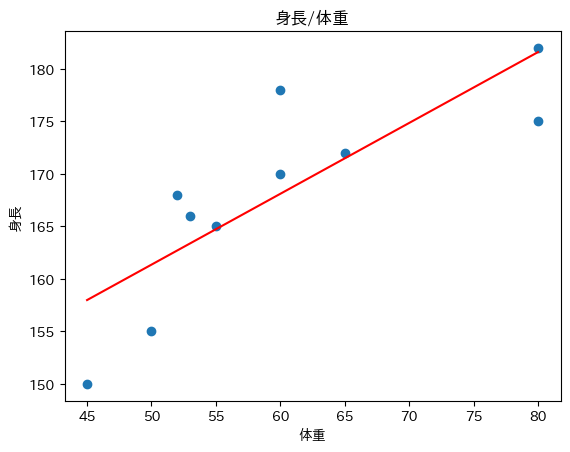

In [28]:
fig, ax = plt.subplots()

line_x = np.linspace(x.min(), x.max())
line_y = reg_a * line_x + reg_b

ax.set_title("身長/体重")
ax.set_xlabel("体重")
ax.set_ylabel("身長")
ax.plot(line_x, line_y, color='Red')
ax.scatter(body_df['体重'], body_df['身長'], marker='o')
plt.show()

### numpyで回帰直線を求める
以下のように傾きと切片を求めることができる

In [29]:
reg = np.polyfit(x, y, deg=1)
reg

array([  0.67468944, 127.61863354])

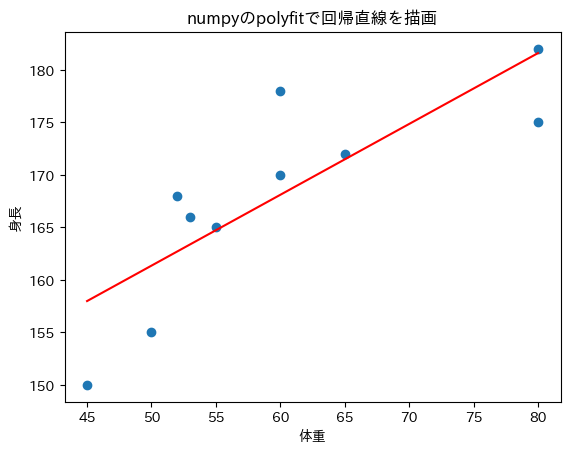

In [30]:
fig, ax = plt.subplots()

line_x = np.linspace(x.min(), x.max())
line_y = reg[0] * line_x + reg[1]

ax.set_title("numpyのpolyfitで回帰直線を描画")
ax.set_xlabel("体重")
ax.set_ylabel("身長")
ax.plot(line_x, line_y, color='Red')
ax.scatter(body_df['体重'], body_df['身長'], marker='o')
plt.show()

### sklearnで回帰直線を求める

In [41]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
X = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

reg.fit(X, y)

print('a = ', reg.coef_)
print('b = ', reg.intercept_)

a =  [[0.67468944]]
b =  [127.61863354]


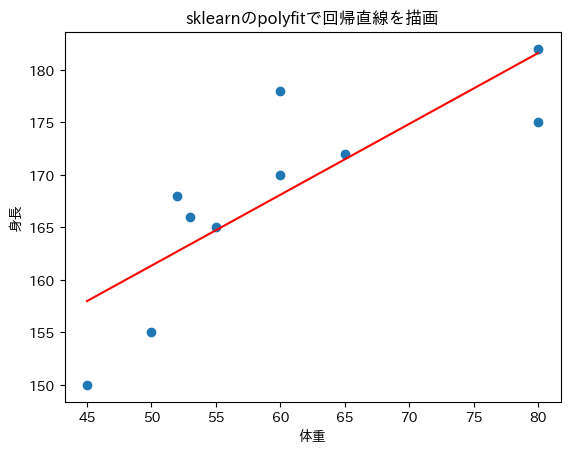

In [44]:
fig, ax = plt.subplots()

line_x = np.linspace(x.min(), x.max())
line_y = reg.coef_[0] * line_x + reg.intercept_[0]

ax.set_title("sklearnのpolyfitで回帰直線を描画")
ax.set_xlabel("体重")
ax.set_ylabel("身長")
ax.plot(line_x, line_y, color='Red')
ax.scatter(body_df['体重'], body_df['身長'], marker='o')
plt.show()